# Plan

It is well known that a good approximation of the behavior of the diabatic crossing probabilities in a two hamiltonian system controlled by a linear-over-time coupling , is given by the Landau-Zenner equation : 
$$P_D = e^ {-2\pi\Gamma}
\\\mbox{where   }
\Gamma = \frac{a^2}{\hbar|\alpha|}$$

In this notebook I wish to examine the behavior when adding an additional random-hamiltoniam term.

## The process
Instead of the well examining the well studied behavior of a system whose time hamitonian is described by the formula:
$$H(t) = H_0*{\frac{t_{max}-t}{t_{max}}}+H_1*{\frac{t}{t_{max}}}$$
We want to examine the hamitonian:
$$H(t) = H_0*{\frac{t_{max}-t}{t_{max}}}+H_1*{\frac{t}{t_{max}}} + H_{rand}(t)*f(t,t_{max})$$
Initially I will examine the case where $H_{rand}(t)$ is some hamiltonian, that in each time step is randomly switched on or off, or formally : 

Let $\hat{H}$ be some hermitian matrix of the same dimension as $H_0$ and $H_1$ (we will later generate in using the `rand_herm` function)
$$H(t) =
\left\{
	\begin{array}{ll}
		\hat{H}  & \mbox{with probability p}  \\
		0 & \mbox{otherwise}
	\end{array}
\right.$$
and in order to reduce the effect of random term in the end of computation, set $f(t,t_{max})={\frac{t_{max}-t}{t_{max}}}$.

In [ ]:
%matplotlib inline

from IPython.display import Image,display

from numpy import pi

from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import LH_tools

# from importlib import reload 
# reload(LH_tools)

In [ ]:
def generate_random_sweep_ham(H_init, H_final, H_rand):
    H = [[H_init,'(t_max-t)/t_max'],
         [H_rand, 'np.random.choice((0,1),p=[1-p,p])*(t_max-t)/t_max'],
         [H_final, 't/t_max']]
    return H

In [46]:
H0, psi0 = LH_tools.gen_simple_ham(3)
# rotate by hadamard transform 
rot_H0, rot_psi0 = LH_tools.rotate_by_had(H0, psi0)
LH = LH_tools.gen_SAT_LH()
H_rand = rand_herm(H0.shape[0], dims=H0.dims)

In [60]:
h_t = generate_random_sweep_ham(rot_H0, LH, H_rand)
# h_t= [[had_simple_ham,'(t_max-t)/t_max'],[H_final, 't/t_max']]

#Compute list of probabilities:
list_of_pr_for_psi0_in_end = []
list_of_pr_for_psi0_in_mid = []
for speed in range(1,20):
    tlist = np.linspace(0, speed, 200)
    args = {'t_max': max(tlist),'tlist':tlist,'p':9/10}
    P_mat,evals_mat = LH_tools.simulate_adiabatic_process2(tlist, h_t, args, rot_psi0, False)
    list_of_pr_for_psi0_in_end.append(P_mat[-1][0])
pr_of_jump_in_end_rand = np.ones(19)-list_of_pr_for_psi0_in_end

In [61]:
#Create data for original hamiltonians without the random term
h_t = [[rot_H0,'(t_max-t)/t_max'],
         [LH, 't/t_max']]


#Compute list of probabilities:
list_of_pr_for_psi0_in_end = []
list_of_pr_for_psi0_in_mid = []
for speed in range(1,20):
    tlist = np.linspace(0, speed, 200)
    args = {'t_max': max(tlist),'tlist':tlist,'p':9/10}
    P_mat,evals_mat = LH_tools.simulate_adiabatic_process2(tlist, h_t, args, rot_psi0, False)
    list_of_pr_for_psi0_in_end.append(P_mat[-1][0])
pr_of_jump_in_end_orig = np.ones(19)-list_of_pr_for_psi0_in_end

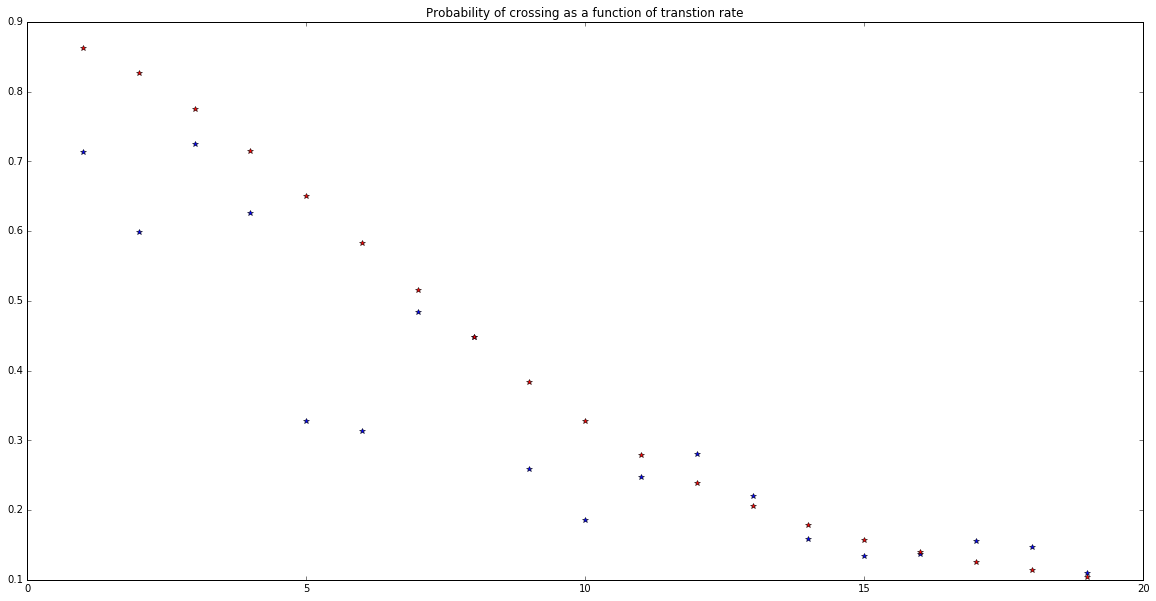

In [77]:
x = np.linspace(1,len(pr_of_jump_in_end_orig),len(pr_of_jump_in_end_orig))
plt.figure(figsize=(20,10))
plt.plot(x, pr_of_jump_in_end_rand,'*',color='blue')
plt.plot(x, pr_of_jump_in_end_orig,'*',color='red')
plt.title("Probability of crossing as a function of transtion rate")
plt.show()

In [75]:
Qobj.evaluate

1.0